In [1]:
import pandas as pd
import numpy as np
import copy
from scipy import stats
from scipy.stats import pearsonr
import seaborn as sn
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_sus_1 = pd.read_csv("Data/DB_Experiment_T1.csv")
data_sus_2 = pd.read_csv("Data/DB_Experiment_T2.csv")

# A) Clean and Transform Survey Dataset

## Calculate SUS Score

### 1. Define columns with positive/negative formulation.

In [3]:
data_sus_1.columns

Index(['Timestamp', 'Meine Identifikationsnummer:', 'Bewertetes System',
       '1 - Ich kann mir sehr gut vorstellen, das System regelmäßig zu nutzen.',
       '2 - Ich empfinde das System als unnötig komplex.',
       '3 - Ich empfinde das System als einfach zu nutzen.',
       '4 - Ich denke, dass ich technischen Support brauchen würde, um das System zu nutzen.',
       '5 - Ich finde, dass die verschiedenen Funktionen des Systems gut integriert sind.',
       '6 - Ich finde, dass es im System zu viele Inkonsistenzen gibt.',
       '7 - Ich kann mir vorstellen, dass die meisten Leute das System schnell zu beherrschen lernen.',
       '8 - Ich empfinde die Bedienung als sehr umständlich.',
       '9 - Ich habe mich bei der Nutzung des Systems sehr sicher gefühlt.',
       '10 - Ich musste eine Menge Dinge lernen, bevor ich mit dem System arbeiten konnte.',
       'Wie bewerten Sie Ihre Gesamtzufriedenheit mit dem Buchungsverfahren?'],
      dtype='object')

In [4]:
pos_col = ["1 - Ich kann mir sehr gut vorstellen, das System regelmäßig zu nutzen.",
        "3 - Ich empfinde das System als einfach zu nutzen.",
          "5 - Ich finde, dass die verschiedenen Funktionen des Systems gut integriert sind.",
          "7 - Ich kann mir vorstellen, dass die meisten Leute das System schnell zu beherrschen lernen.",
          "9 - Ich habe mich bei der Nutzung des Systems sehr sicher gefühlt."]

neg_col = ["2 - Ich empfinde das System als unnötig komplex.",
          "4 - Ich denke, dass ich technischen Support brauchen würde, um das System zu nutzen.",
          "6 - Ich finde, dass es im System zu viele Inkonsistenzen gibt.",
          "8 - Ich empfinde die Bedienung als sehr umständlich.",
          "10 - Ich musste eine Menge Dinge lernen, bevor ich mit dem System arbeiten konnte."]

### 2. Transform values into SUS categories

In [5]:
sus_score_t1 = copy.deepcopy(data_sus_1)
sus_score_t2 = copy.deepcopy(data_sus_2)

In [6]:
def convert_to_sus(data, cols, pos):
    '''data: Pandas dataframe
       cols: columns with SUS ratings from 1-5
       pos: True if the question formulation is positive
       returns: SUS ratings'''
    if pos == True:
        return data[cols] -1
    elif pos == False:
        return 5 - data[cols]
    return
    

In [7]:
sus_score_t1[pos_col] = convert_to_sus(data_sus_1,pos_col,True)
sus_score_t1[neg_col] = convert_to_sus(data_sus_1,neg_col,False)

In [8]:
sus_score_t2[pos_col] = convert_to_sus(data_sus_2,pos_col,True)
sus_score_t2[neg_col] = convert_to_sus(data_sus_2,neg_col,False)

### 3. Calculate Score

In [9]:
def sus_score(data, cols):
    '''data: Pandas dataframe
       cols: columns with SUS ratings
       returns: SUS score'''
    return data[cols].sum(axis=1)*2.5

In [10]:
all_cols = pos_col + neg_col

In [11]:
sus_score_t1["SUS_score"] = sus_score(sus_score_t1,all_cols)
sus_score_t2["SUS_score"] = sus_score(sus_score_t2,all_cols)

In [12]:
sus_score_t1.columns

Index(['Timestamp', 'Meine Identifikationsnummer:', 'Bewertetes System',
       '1 - Ich kann mir sehr gut vorstellen, das System regelmäßig zu nutzen.',
       '2 - Ich empfinde das System als unnötig komplex.',
       '3 - Ich empfinde das System als einfach zu nutzen.',
       '4 - Ich denke, dass ich technischen Support brauchen würde, um das System zu nutzen.',
       '5 - Ich finde, dass die verschiedenen Funktionen des Systems gut integriert sind.',
       '6 - Ich finde, dass es im System zu viele Inkonsistenzen gibt.',
       '7 - Ich kann mir vorstellen, dass die meisten Leute das System schnell zu beherrschen lernen.',
       '8 - Ich empfinde die Bedienung als sehr umständlich.',
       '9 - Ich habe mich bei der Nutzung des Systems sehr sicher gefühlt.',
       '10 - Ich musste eine Menge Dinge lernen, bevor ich mit dem System arbeiten konnte.',
       'Wie bewerten Sie Ihre Gesamtzufriedenheit mit dem Buchungsverfahren?',
       'SUS_score'],
      dtype='object')

## Merge datasets

### 1. Change column names

In [13]:
col_new = {
    'Meine Identifikationsnummer:': 'Id',
    'Bewertetes System': 'System',
    'Wie bewerten Sie Ihre Gesamtzufriedenheit mit dem Buchungsverfahren?': 'CSAT',
    'Bitte geben Sie Ihr Geschlecht an.': 'Geschlecht',
    'Zu welcher der nachfolgenden Alterskategorien gehören Sie?': 'Alter',
    'Was ist Ihr höchster Schul- oder Hochschulabschluss?': 'Abschluss',
    'Welche der folgenden Kategorien beschreibt Ihren Beschäftigungsstatus am besten?': 'Beruf',
    'Wie oft kaufen Sie Fahrkarten auf der DB Website?': 'Nutzung_web',
    'Wie oft kaufen Sie Fahrkarten am DB Automaten?': 'Nutzung_automat'
}

In [14]:
sus_score_t1 = sus_score_t1.rename(columns=col_new)
sus_score_t2 = sus_score_t2.rename(columns=col_new)

### 2. Drop SUS individual rating columns

In [15]:
sus_score_t1 = sus_score_t1.drop(columns=all_cols)
sus_score_t2 = sus_score_t2.drop(columns=all_cols)

### 3. Merge datasets on Id column

In [16]:
survey_data = sus_score_t1.merge(sus_score_t2, left_on="Id", right_on="Id", suffixes=("_T1", "_T2"))

In [17]:
survey_data

Timestamp_T1  Id System_T1  CSAT_T1  SUS_score_T1  \
0  2021/07/15 11:33:27 am EET   1   Automat        4          77.5   
1  2021/07/15 12:15:06 pm EET   2   Automat        4          72.5   
2  2021/07/25 11:31:10 am EET   3   Automat        2          30.0   
3  2021/07/25 11:58:57 am EET   4   Automat        3          52.5   
4  2021/07/25 12:32:18 pm EET   5   Automat        4          95.0   
5   2021/07/25 1:40:46 pm EET   6   Website        4          65.0   
6   2021/07/25 2:33:28 pm EET   7   Website        5          90.0   
7   2021/07/25 3:02:52 pm EET   8   Website        4          60.0   
8   2021/08/06 2:00:09 pm EET   9   Website        4          67.5   
9   2021/08/06 2:45:53 pm EET  10   Website        5          72.5   

                 Timestamp_T2 System_T2  CSAT_T2 Geschlecht  Alter  \
0  2021/07/15 11:59:18 am EET   Website        2   Männlich  21-29   
1  2021/07/15 12:23:45 pm EET   Website        4   Weiblich  21-29   
2  2021/07/25 11:41:45 am EET   Website        4   Männlich  21-29   
3  2021/07/25 12:12:40 pm EET   Website        4   Weiblich  21-29   
4  2021/07/25 12:47:48 pm EET   Website        4   Weiblich  21-29   
5   2021/07/25 2:14:45 pm EET   Automat        4   Männlich  21-29   
6   2021/07/25 2:48:55 pm EET   Automat        5     Divers  30-39   
7  2021/07/26 12:23:33 pm EET   Automat        5   Männlich  21-29   
8   2021/08/06 2:18:24 pm EET   Automat        5   Männlich  40-49   
9   2021/08/06 2:46:53 pm EET   Automat        5   Männlich  21-29   

                Abschluss                                              Beruf  \
0  Studium ohne Abschluss                                        Studierende   
1  Studium ohne Abschluss                                        Studierende   
2  Studium ohne Abschluss                                        Studierende   
3  Studium ohne Abschluss                                        Studierende   
4        Master-Abschluss                                        Studierende   
5        Master-Abschluss                 Ohne Beschäftigung, arbeitssuchend   
6             Doktor-Grad  Angestellt, Wochenarbeitszeit von 40 Stunden o...   
7      Bachelor-Abschluss                                        Studierende   
8      Bachelor-Abschluss  Angestellt, Wochenarbeitszeit von 40 Stunden o...   
9  Studium ohne Abschluss                                        Studierende   

                             Nutzung_web             Nutzung_automat  \
0                         Einmal im Jahr              Einmal im Jahr   
1                  Bis dreimal monatlich              Einmal im Jahr   
2  Zwischen sieben- und zwölfmal im Jahr                         Nie   
3  Zwischen sieben- und zwölfmal im Jahr              Einmal im Jahr   
4             Höchstens sechsmal im Jahr              Einmal im Jahr   
5             Höchstens sechsmal im Jahr                         Nie   
6                  Bis dreimal monatlich   Höchstens dreimal im Jahr   
7              Höchstens dreimal im Jahr   Höchstens dreimal im Jahr   
8              Höchstens dreimal im Jahr   Höchstens dreimal im Jahr   
9             Höchstens sechsmal im Jahr  Höchstens sechsmal im Jahr   

   SUS_score_T2  
0          47.5  
1          92.5  
2          80.0  
3          67.5  
4          77.5  
5          72.5  
6          87.5  
7          62.5  
8          70.0  
9          85.0

In [18]:
# survey_data.to_csv("Data/21-08-16_survey_data.csv", index=False)

## Check bias

### Are the first (t1) and second (t2) treatment SUS and CSAT scores sgnificantly different from each other?<br><br>If so, there are chances that the order of treatments had influenced ratings.

### H0: T1 and T2 (2 related samples) have identical average (expected) values.

See: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

In [19]:
stats.ttest_rel(survey_data["SUS_score_T1"],survey_data["SUS_score_T2"])

Ttest_relResult(statistic=-0.8780487804878049, pvalue=0.40274880913032163)

In [20]:
stats.ttest_rel(survey_data["CSAT_T1"],survey_data["CSAT_T2"])

Ttest_relResult(statistic=-0.8955334711889903, pvalue=0.39382281469156144)

## Because p-value > 0.05 we DO NOT reject H0.

## <font color="red">Result</font>: T1 and T2 have identical avg expected values, we assume there is  <font color="red">no order bias</font>.

# B) Clean and Transform Randomization Dataset

In [21]:
data_control = pd.read_csv("Data/Experiment_Randomisierung.csv")

In [22]:
data_control = data_control[['Person_Id', 'System_T1', 'System_T2',
       'Ziel_T1', 'Ziel_T2', 'Aufgabe_T1_1', 'Aufgabe_T1_2', 'Aufgabe_T1_3',
       'Aufgabe_T1_4', 'Aufgabe_T2_1', 'Aufgabe_T2_2', 'Aufgabe_T2_3',
       'Aufgabe_T2_4', 'Dauer_T1_1', 'Klicks_T1_1', 'Dauer_T1_2',
       'Klicks_T1_2', 'Dauer_T1_3', 'Klicks_T1_3', 'Dauer_T1_4', 'Klicks_T1_4',
       'Dauer_T2_1', 'Klicks_T2_1', 'Dauer_T2_2', 'Klicks_T2_2', 'Dauer_T2_3',
       'Klicks_T2_3', 'Dauer_T2_4', 'Klicks_T2_4']]

In [23]:
data_control

Person_Id System_T1 System_T2 Ziel_T1 Ziel_T2 Aufgabe_T1_1 Aufgabe_T1_2  \
0          1   Automat   Website      V1      V2            A            B   
1          2   Automat   Website      V1      V2            B            C   
2          3   Automat   Website      V1      V2            C            D   
3          4   Automat   Website      V2      V1            D            A   
4          5   Automat   Website      V2      V1            A            B   
5          6   Website   Automat      V1      V2            B            C   
6          7   Website   Automat      V1      V2            C            D   
7          8   Website   Automat      V1      V2            D            A   
8          9   Website   Automat      V2      V1            A            B   
9         10   Website   Automat      V2      V1            B            C   

  Aufgabe_T1_3 Aufgabe_T1_4 Aufgabe_T2_1  ... Dauer_T1_4 Klicks_T1_4  \
0            C            D            B  ...    0:01:21          27   
1            D            A            A  ...    0:00:36          15   
2            A            B            D  ...    0:00:50          22   
3            B            C            C  ...    0:01:08          30   
4            C            D            B  ...    0:01:14          32   
5            D            A            A  ...    0:00:41          19   
6            A            B            D  ...    0:00:36          16   
7            B            C            C  ...    0:01:49          27   
8            C            D            B  ...   00:01:05          35   
9            D            A            A  ...    0:00:28          12   

  Dauer_T2_1 Klicks_T2_1  Dauer_T2_2 Klicks_T2_2  Dauer_T2_3 Klicks_T2_3  \
0    0:01:45          22     0:00:35          14     0:02:46          32   
1    0:00:31          15     0:00:53          24     0:01:02          33   
2    0:00:55          18     0:00:46          23     0:00:48          17   
3    0:02:00          36    00:01:23          24     0:00:46          14   
4    0:02:10          27     0:00:40          13     0:01:10          27   
5    0:01:02          23     0:01:17          27     0:01:30          39   
6    0:00:44          24     0:00:57          28     0:00:44          22   
7    0:01:07          29     0:00:57          26     0:00:28          16   
8    0:01:30          35     0:01:27          31     0:00:57          25   
9    0:01:01          15     0:01:10          27     0:01:40          30   

   Dauer_T2_4 Klicks_T2_4  
0     0:01:25          31  
1     0:00:58          21  
2     0:00:15          10  
3     0:00:50          23  
4     0:01:30          30  
5     0:01:09          26  
6     0:00:18           7  
7     0:01:01          29  
8     0:01:01          35  
9     0:01:50          41  

[10 rows x 29 columns]

## Data Cleaning and Transformation

### 1. Convert string value in columns "Dauer" into elapsed time

In [24]:
for col in data_control.columns:
    
    if "Dauer" in col:
        data_control[col] = pd.to_timedelta(data_control[col])


### 2. Calculate interaction speed Klicks/Dauer

In [25]:
duration_cols = [cols for cols in data_control.columns if "Dauer" in cols]
clicks_cols = [cols for cols in data_control.columns if "Klicks" in cols]

In [26]:
speed_cols = ['Speed_T1_1',
 'Speed_T1_2',
 'Speed_T1_3',
 'Speed_T1_4',
 'Speed_T2_1',
 'Speed_T2_2',
 'Speed_T2_3',
 'Speed_T2_4']

In [27]:
for clicks,time,speed in zip(clicks_cols, duration_cols, speed_cols):
    data_control[speed] = data_control[clicks]/data_control[time].dt.total_seconds()

In [28]:
data_control[['Dauer_T1_1','Klicks_T1_1','Speed_T1_1']]

Dauer_T1_1  Klicks_T1_1  Speed_T1_1
0 0 days 00:01:16           24    0.315789
1 0 days 00:01:57           39    0.333333
2 0 days 00:02:34           64    0.415584
3 0 days 00:01:26           25    0.290698
4 0 days 00:01:33           42    0.451613
5 0 days 00:02:00           34    0.283333
6 0 days 00:00:49           29    0.591837
7 0 days 00:01:22           24    0.292683
8 0 days 00:00:40           18    0.450000
9 0 days 00:01:30           29    0.322222

### 3. Calculate average clicks, duration and speed for each treatment

In [29]:
clicks_t1 = [cols for cols in clicks_cols if "T1" in cols]
clicks_t2 = [cols for cols in clicks_cols if "T2" in cols]
time_t1 = [cols for cols in duration_cols if "T1" in cols]
time_t2 = [cols for cols in duration_cols if "T2" in cols]

data_control["Avg_clicks_T1"] = data_control[clicks_t1].sum(axis=1)/4
data_control["Avg_clicks_T2"] = data_control[clicks_t2].sum(axis=1)/4
data_control["Avg_duration_T1"] = data_control[time_t1].sum(axis=1).dt.total_seconds()/4
data_control["Avg_duration_T2"] = data_control[time_t2].sum(axis=1).dt.total_seconds()/4
data_control["Avg_speed_T1"] = data_control[clicks_t1].sum(axis=1)/data_control[time_t1].sum(axis=1).dt.total_seconds()
data_control["Avg_speed_T2"] = data_control[clicks_t2].sum(axis=1)/data_control[time_t2].sum(axis=1).dt.total_seconds()

In [30]:
# data_control.to_csv("Data/21-08-17_data_control_avg_speed.csv", index=False)

# C) Data Analysis

## Transform dataset to compare treatments

### 1. Merge data control and survey datasets

In [31]:
survey_data_control = survey_data.merge(data_control, left_on="Id", right_on="Person_Id", suffixes=("_survey", "_control"))

In [32]:
# survey_data_control.to_csv("Data/21-08-16_survey_data_control.csv",index=False)

In [33]:
# survey_data_control = pd.read_csv("Data/21-08-16_survey_data_control.csv")
# survey_data_control = survey_data_control.drop(columns="Unnamed: 0")

### 2. Select relevant columns only

In [34]:
cols = ['Id', 'System_T1_survey', 'CSAT_T1', 'SUS_score_T1',
       'System_T2_survey', 'CSAT_T2', 'SUS_score_T2',
       'Aufgabe_T1_1', 'Aufgabe_T1_2', 'Aufgabe_T1_3',
       'Aufgabe_T1_4', 'Aufgabe_T2_1', 'Aufgabe_T2_2', 'Aufgabe_T2_3',
       'Aufgabe_T2_4', 'Dauer_T1_1', 'Klicks_T1_1', 'Dauer_T1_2',
       'Klicks_T1_2', 'Dauer_T1_3', 'Klicks_T1_3', 'Dauer_T1_4', 'Klicks_T1_4',
       'Dauer_T2_1', 'Klicks_T2_1', 'Dauer_T2_2', 'Klicks_T2_2', 'Dauer_T2_3',
       'Klicks_T2_3', 'Dauer_T2_4', 'Klicks_T2_4', 'Speed_T1_1', 'Speed_T1_2',
       'Speed_T1_3', 'Speed_T1_4', 'Speed_T2_1', 'Speed_T2_2', 'Speed_T2_3',
       'Speed_T2_4', 'Avg_speed_T1', 'Avg_speed_T2',
        'Avg_clicks_T1', 'Avg_clicks_T2','Avg_duration_T1', 'Avg_duration_T2']

cols_demo = ['Id', 'System_T1_survey', 'System_T2_survey', 'Geschlecht', 'Alter',
       'Abschluss', 'Beruf', 'Nutzung_web', 'Nutzung_automat']

In [35]:
data_treatments = survey_data_control[cols]
data_demographics = survey_data_control[cols_demo]

### 3. Substitute T* in column names for treatment type

In [36]:
part_1 = data_treatments[data_treatments["System_T1_survey"] == "Automat"]
part_2 = data_treatments[data_treatments["System_T1_survey"] == "Website"]

In [37]:
part_1["System_T1_survey"] = "T1"
part_1["System_T2_survey"] = "T2"
part_2["System_T1_survey"] = "T1"
part_2["System_T2_survey"] = "T2"

C:\Users\taian\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\taian\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\taian\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [38]:
part_1.columns = part_1.columns.str.replace("T1", "Auto")
part_1.columns = part_1.columns.str.replace("T2", "Web")
part_2.columns = part_2.columns.str.replace("T1", "Web")
part_2.columns = part_2.columns.str.replace("T2", "Auto")

### 4. Substitute number in column names for Task type

In [39]:
part_2

Id System_Web_survey  CSAT_Web  SUS_score_Web System_Auto_survey  \
5   6                T1         4           65.0                 T2   
6   7                T1         5           90.0                 T2   
7   8                T1         4           60.0                 T2   
8   9                T1         4           67.5                 T2   
9  10                T1         5           72.5                 T2   

   CSAT_Auto  SUS_score_Auto Aufgabe_Web_1 Aufgabe_Web_2 Aufgabe_Web_3  ...  \
5          4            72.5             B             C             D  ...   
6          5            87.5             C             D             A  ...   
7          5            62.5             D             A             B  ...   
8          5            70.0             A             B             C  ...   
9          5            85.0             B             C             D  ...   

  Speed_Auto_1 Speed_Auto_2 Speed_Auto_3 Speed_Auto_4 Avg_speed_Web  \
5     0.370968     0.350649     0.433333     0.376812      0.324251   
6     0.545455     0.491228     0.500000     0.388889      0.496732   
7     0.432836     0.456140     0.571429     0.475410      0.282738   
8     0.388889     0.356322     0.438596     0.573770      0.463710   
9     0.245902     0.385714     0.300000     0.372727      0.533679   

  Avg_speed_Auto  Avg_clicks_Web Avg_clicks_Auto  Avg_duration_Web  \
5       0.385906           29.75           28.75             91.75   
6       0.496933           19.00           20.25             38.25   
7       0.469484           23.75           25.00             84.00   
8       0.427119           28.75           31.50             62.00   
9       0.331378           25.75           28.25             48.25   

  Avg_duration_Auto  
5             74.50  
6             40.75  
7             53.25  
8             73.75  
9             85.25  

[5 rows x 45 columns]

In [40]:
def transform_tasks(data, cols):
    '''data: pandas dataframe with task metrics
       cols: columns in the dataset linking tasks to task numbers
       returns: dictionary with metrics organized by task and participant id'''
    tasks = []

    for i,row in data.iterrows():
        task_dict = {}
        for c in cols:

            t = c.split("_",1)[1]
            aufgabe = row[c]
            number = t.split("_",1)[1]
            col_old = pd.Series([col for col in data.columns if t in col])
            col_new = col_old.str.replace(number, aufgabe)

            
            task_dict["Id"] = row["Id"]

            for x,y in zip(col_old[1:],col_new[1:]):
                task_dict[y] = row[x]

        tasks.append(task_dict)
        
    return tasks

In [41]:
columns = pd.Series(['Aufgabe_Auto_1', 'Aufgabe_Auto_2', 'Aufgabe_Auto_3', 'Aufgabe_Auto_4', 'Aufgabe_Web_1', 'Aufgabe_Web_2', 'Aufgabe_Web_3', 'Aufgabe_Web_4'])

In [42]:
df_treatments = part_1.append(part_2)

In [43]:
to_dict = transform_tasks(df_treatments,columns)

In [44]:
df_treatments

Id System_Auto_survey  CSAT_Auto  SUS_score_Auto System_Web_survey  \
0   1                 T1          4            77.5                T2   
1   2                 T1          4            72.5                T2   
2   3                 T1          2            30.0                T2   
3   4                 T1          3            52.5                T2   
4   5                 T1          4            95.0                T2   
5   6                 T2          4            72.5                T1   
6   7                 T2          5            87.5                T1   
7   8                 T2          5            62.5                T1   
8   9                 T2          5            70.0                T1   
9  10                 T2          5            85.0                T1   

   CSAT_Web  SUS_score_Web Aufgabe_Auto_1 Aufgabe_Auto_2 Aufgabe_Auto_3  ...  \
0         2           47.5              A              B              C  ...   
1         4           92.5              B              C              D  ...   
2         4           80.0              C              D              A  ...   
3         4           67.5              D              A              B  ...   
4         4           77.5              A              B              C  ...   
5         4           65.0              A              D              C  ...   
6         5           90.0              D              C              B  ...   
7         4           60.0              C              B              A  ...   
8         4           67.5              B              A              D  ...   
9         5           72.5              A              D              C  ...   

  Speed_Web_1 Speed_Web_2 Speed_Web_3 Speed_Web_4 Avg_speed_Auto  \
0    0.209524    0.400000    0.192771    0.364706       0.396341   
1    0.483871    0.452830    0.532258    0.362069       0.385906   
2    0.327273    0.500000    0.354167    0.666667       0.440860   
3    0.300000    0.289157    0.304348    0.460000       0.370079   
4    0.207692    0.325000    0.385714    0.333333       0.391304   
5    0.283333    0.230769    0.473684    0.463415       0.385906   
6    0.591837    0.425532    0.523810    0.444444       0.496933   
7    0.292683    0.452381    0.242718    0.247706       0.469484   
8    0.450000    0.500000    0.395604    0.538462       0.427119   
9    0.322222    1.360000    0.560000    0.428571       0.331378   

  Avg_speed_Web  Avg_clicks_Auto Avg_clicks_Web  Avg_duration_Auto  \
0      0.253197            48.75          24.75             123.00   
1      0.455882            28.75          23.25              74.50   
2      0.414634            30.75          17.00              69.75   
3      0.324415            23.50          24.25              63.50   
4      0.293939            38.25          24.25              97.75   
5      0.324251            28.75          29.75              74.50   
6      0.496732            20.25          19.00              40.75   
7      0.282738            25.00          23.75              53.25   
8      0.463710            31.50          28.75              73.75   
9      0.533679            28.25          25.75              85.25   

  Avg_duration_Web  
0            97.75  
1            51.00  
2            41.00  
3            74.75  
4            82.50  
5            91.75  
6            38.25  
7            84.00  
8            62.00  
9            48.25  

[10 rows x 45 columns]

In [45]:
df_aufgaben = pd.DataFrame(to_dict)

In [46]:
df_aufgaben

Id    Dauer_Auto_A  Klicks_Auto_A  Speed_Auto_A    Dauer_Auto_B  \
0   1 0 days 00:01:16             24      0.315789 0 days 00:03:38   
1   2 0 days 00:00:36             15      0.416667 0 days 00:01:57   
2   3 0 days 00:00:27             13      0.481481 0 days 00:00:50   
3   4 0 days 00:00:34             16      0.470588 0 days 00:01:06   
4   5 0 days 00:01:33             42      0.451613 0 days 00:01:41   
5   6 0 days 00:01:02             23      0.370968 0 days 00:01:09   
6   7 0 days 00:00:18              7      0.388889 0 days 00:00:44   
7   8 0 days 00:00:28             16      0.571429 0 days 00:00:57   
8   9 0 days 00:01:27             31      0.356322 0 days 00:01:30   
9  10 0 days 00:01:01             15      0.245902 0 days 00:01:50   

   Klicks_Auto_B  Speed_Auto_B    Dauer_Auto_C  Klicks_Auto_C  Speed_Auto_C  \
0            105      0.481651 0 days 00:01:57             39      0.333333   
1             39      0.333333 0 days 00:01:21             31      0.382716   
2             22      0.440000 0 days 00:02:34             64      0.415584   
3             23      0.348485 0 days 00:01:08             30      0.441176   
4             34      0.336634 0 days 00:02:03             45      0.365854   
5             26      0.376812 0 days 00:01:30             39      0.433333   
6             22      0.500000 0 days 00:00:57             28      0.491228   
7             26      0.456140 0 days 00:01:07             29      0.432836   
8             35      0.388889 0 days 00:01:01             35      0.573770   
9             41      0.372727 0 days 00:01:40             30      0.300000   

   ... Speed_Web_B     Dauer_Web_A  Klicks_Web_A Speed_Web_A     Dauer_Web_D  \
0  ...    0.209524 0 days 00:00:35            14    0.400000 0 days 00:02:46   
1  ...    0.362069 0 days 00:00:31            15    0.483871 0 days 00:00:53   
2  ...    0.354167 0 days 00:00:15            10    0.666667 0 days 00:00:55   
3  ...    0.289157 0 days 00:00:46            14    0.304348 0 days 00:00:50   
4  ...    0.207692 0 days 00:00:40            13    0.325000 0 days 00:01:10   
5  ...    0.283333 0 days 00:00:41            19    0.463415 0 days 00:01:16   
6  ...    0.444444 0 days 00:00:21            11    0.523810 0 days 00:00:47   
7  ...    0.242718 0 days 00:00:42            19    0.452381 0 days 00:01:22   
8  ...    0.500000 0 days 00:00:40            18    0.450000 0 days 00:01:05   
9  ...    0.322222 0 days 00:00:28            12    0.428571 0 days 00:00:50   

   Klicks_Web_D Speed_Web_D     Dauer_Web_C  Klicks_Web_C Speed_Web_C  
0            32    0.192771 0 days 00:01:25            31    0.364706  
1            24    0.452830 0 days 00:01:02            33    0.532258  
2            18    0.327273 0 days 00:00:46            23    0.500000  
3            23    0.460000 0 days 00:02:00            36    0.300000  
4            27    0.385714 0 days 00:01:30            30    0.333333  
5            36    0.473684 0 days 00:02:10            30    0.230769  
6            20    0.425532 0 days 00:00:49            29    0.591837  
7            24    0.292683 0 days 00:01:49            27    0.247706  
8            35    0.538462 0 days 00:01:31            36    0.395604  
9            28    0.560000 0 days 00:00:25            34    1.360000  

[10 rows x 25 columns]

### 5. Extend Data Treatment dataset with reordered columns

In [47]:
data_reordered = df_treatments.merge(df_aufgaben, left_on="Id", right_on="Id", suffixes=("", "_ordered"))

In [48]:
data_reordered

Id System_Auto_survey  CSAT_Auto  SUS_score_Auto System_Web_survey  \
0   1                 T1          4            77.5                T2   
1   2                 T1          4            72.5                T2   
2   3                 T1          2            30.0                T2   
3   4                 T1          3            52.5                T2   
4   5                 T1          4            95.0                T2   
5   6                 T2          4            72.5                T1   
6   7                 T2          5            87.5                T1   
7   8                 T2          5            62.5                T1   
8   9                 T2          5            70.0                T1   
9  10                 T2          5            85.0                T1   

   CSAT_Web  SUS_score_Web Aufgabe_Auto_1 Aufgabe_Auto_2 Aufgabe_Auto_3  ...  \
0         2           47.5              A              B              C  ...   
1         4           92.5              B              C              D  ...   
2         4           80.0              C              D              A  ...   
3         4           67.5              D              A              B  ...   
4         4           77.5              A              B              C  ...   
5         4           65.0              A              D              C  ...   
6         5           90.0              D              C              B  ...   
7         4           60.0              C              B              A  ...   
8         4           67.5              B              A              D  ...   
9         5           72.5              A              D              C  ...   

  Speed_Web_B     Dauer_Web_A Klicks_Web_A Speed_Web_A     Dauer_Web_D  \
0    0.209524 0 days 00:00:35           14    0.400000 0 days 00:02:46   
1    0.362069 0 days 00:00:31           15    0.483871 0 days 00:00:53   
2    0.354167 0 days 00:00:15           10    0.666667 0 days 00:00:55   
3    0.289157 0 days 00:00:46           14    0.304348 0 days 00:00:50   
4    0.207692 0 days 00:00:40           13    0.325000 0 days 00:01:10   
5    0.283333 0 days 00:00:41           19    0.463415 0 days 00:01:16   
6    0.444444 0 days 00:00:21           11    0.523810 0 days 00:00:47   
7    0.242718 0 days 00:00:42           19    0.452381 0 days 00:01:22   
8    0.500000 0 days 00:00:40           18    0.450000 0 days 00:01:05   
9    0.322222 0 days 00:00:28           12    0.428571 0 days 00:00:50   

  Klicks_Web_D  Speed_Web_D     Dauer_Web_C  Klicks_Web_C Speed_Web_C  
0           32     0.192771 0 days 00:01:25            31    0.364706  
1           24     0.452830 0 days 00:01:02            33    0.532258  
2           18     0.327273 0 days 00:00:46            23    0.500000  
3           23     0.460000 0 days 00:02:00            36    0.300000  
4           27     0.385714 0 days 00:01:30            30    0.333333  
5           36     0.473684 0 days 00:02:10            30    0.230769  
6           20     0.425532 0 days 00:00:49            29    0.591837  
7           24     0.292683 0 days 00:01:49            27    0.247706  
8           35     0.538462 0 days 00:01:31            36    0.395604  
9           28     0.560000 0 days 00:00:25            34    1.360000  

[10 rows x 69 columns]

### 6. Extend data reordered with demographic data

In [49]:
data_complete = data_reordered.merge(data_demographics, left_on="Id", right_on="Id", suffixes=("", "_demo"))

In [50]:
data_complete

Id System_Auto_survey  CSAT_Auto  SUS_score_Auto System_Web_survey  \
0   1                 T1          4            77.5                T2   
1   2                 T1          4            72.5                T2   
2   3                 T1          2            30.0                T2   
3   4                 T1          3            52.5                T2   
4   5                 T1          4            95.0                T2   
5   6                 T2          4            72.5                T1   
6   7                 T2          5            87.5                T1   
7   8                 T2          5            62.5                T1   
8   9                 T2          5            70.0                T1   
9  10                 T2          5            85.0                T1   

   CSAT_Web  SUS_score_Web Aufgabe_Auto_1 Aufgabe_Auto_2 Aufgabe_Auto_3  ...  \
0         2           47.5              A              B              C  ...   
1         4           92.5              B              C              D  ...   
2         4           80.0              C              D              A  ...   
3         4           67.5              D              A              B  ...   
4         4           77.5              A              B              C  ...   
5         4           65.0              A              D              C  ...   
6         5           90.0              D              C              B  ...   
7         4           60.0              C              B              A  ...   
8         4           67.5              B              A              D  ...   
9         5           72.5              A              D              C  ...   

  Klicks_Web_C Speed_Web_C System_T1_survey System_T2_survey Geschlecht  \
0           31    0.364706          Automat          Website   Männlich   
1           33    0.532258          Automat          Website   Weiblich   
2           23    0.500000          Automat          Website   Männlich   
3           36    0.300000          Automat          Website   Weiblich   
4           30    0.333333          Automat          Website   Weiblich   
5           30    0.230769          Website          Automat   Männlich   
6           29    0.591837          Website          Automat     Divers   
7           27    0.247706          Website          Automat   Männlich   
8           36    0.395604          Website          Automat   Männlich   
9           34    1.360000          Website          Automat   Männlich   

   Alter               Abschluss  \
0  21-29  Studium ohne Abschluss   
1  21-29  Studium ohne Abschluss   
2  21-29  Studium ohne Abschluss   
3  21-29  Studium ohne Abschluss   
4  21-29        Master-Abschluss   
5  21-29        Master-Abschluss   
6  30-39             Doktor-Grad   
7  21-29      Bachelor-Abschluss   
8  40-49      Bachelor-Abschluss   
9  21-29  Studium ohne Abschluss   

                                               Beruf  \
0                                        Studierende   
1                                        Studierende   
2                                        Studierende   
3                                        Studierende   
4                                        Studierende   
5                 Ohne Beschäftigung, arbeitssuchend   
6  Angestellt, Wochenarbeitszeit von 40 Stunden o...   
7                                        Studierende   
8  Angestellt, Wochenarbeitszeit von 40 Stunden o...   
9                                        Studierende   

                             Nutzung_web             Nutzung_automat  
0                         Einmal im Jahr              Einmal im Jahr  
1                  Bis dreimal monatlich              Einmal im Jahr  
2  Zwischen sieben- und zwölfmal im Jahr                         Nie  
3  Zwischen sieben- und zwölfmal im Jahr              Einmal im Jahr  
4             Höchstens sechsmal im Jahr              Einmal im Jahr  
5             Höchstens sechsmal im Jahr            

In [51]:
# data_complete.to_csv("Data/21-08-17_Data_complete.csv",index=False)

In [52]:
part_1[['Aufgabe_Auto_1','Dauer_Auto_1', 'Klicks_Auto_1', 'Speed_Auto_1']]

Aufgabe_Auto_1    Dauer_Auto_1  Klicks_Auto_1  Speed_Auto_1
0              A 0 days 00:01:16             24      0.315789
1              B 0 days 00:01:57             39      0.333333
2              C 0 days 00:02:34             64      0.415584
3              D 0 days 00:01:26             25      0.290698
4              A 0 days 00:01:33             42      0.451613

# Analyzing score differences across treatments

## 1. Are SUS scores significantly different?

### H0: Treatments Automat and Website (2 related samples) have identical (expected) SUS score.

In [53]:
stats.ttest_rel(data_complete["SUS_score_Auto"],data_complete["SUS_score_Web"])

Ttest_relResult(statistic=-0.21119546450876941, pvalue=0.8374394159122592)

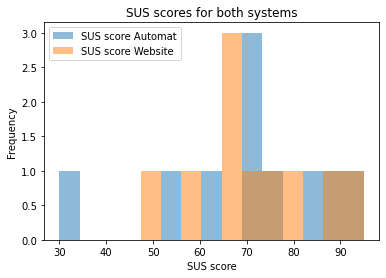

In [54]:
sus = pd.DataFrame([data_complete["SUS_score_Auto"],data_complete["SUS_score_Web"]]).transpose()
sus.columns = ["SUS score Automat","SUS score Website"]
g = sus.plot.hist(bins=15, alpha=0.5)
g.set_title("SUS scores for both systems")
g.set_xlabel("SUS score")
g.get_figure().savefig("Plots/sus_scores.png",bbox_inches = "tight")

In [55]:
sus.describe()

SUS score Automat  SUS score Website
count          10.000000           10.00000
mean           70.500000           72.00000
std            18.811935           13.63207
min            30.000000           47.50000
25%            64.375000           65.62500
50%            72.500000           70.00000
75%            83.125000           79.37500
max            95.000000           92.50000

## <font color="red">Result</font>: SUS scores are <font color="red">identical</font>.

### According to the study linked below, an average SUS above 68 is considered above the average.

### Automat and Website booking experiences are <font color="red">above the average</font>.
See: https://measuringu.com/sus/

## 2. Are CSAT scores significantly different?

### H0: Treatments Automat and Website (2 related samples) have identical (expected) CSAT score.

In [56]:
stats.ttest_rel(data_complete["CSAT_Auto"],data_complete["CSAT_Web"])

Ttest_relResult(statistic=0.28734788556634544, pvalue=0.7803523356242351)

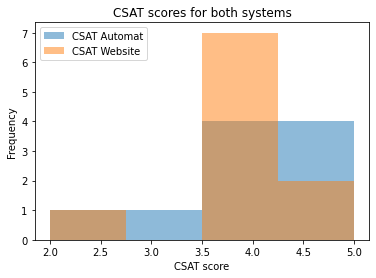

In [57]:
csat = pd.DataFrame([data_complete["CSAT_Auto"],data_complete["CSAT_Web"]]).transpose()
csat.columns = ["CSAT Automat","CSAT Website"]
g = csat.plot.hist(bins=4, alpha=0.5)
g.set_xlabel("CSAT score")
g.set_title("CSAT scores for both systems")
g.get_figure().savefig("Plots/csat_scores.png",bbox_inches = "tight")

In [58]:
csat

CSAT Automat  CSAT Website
0             4             2
1             4             4
2             2             4
3             3             4
4             4             4
5             4             4
6             5             5
7             5             4
8             5             4
9             5             5

In [59]:
csat.describe()

CSAT Automat  CSAT Website
count     10.000000     10.000000
mean       4.100000      4.000000
std        0.994429      0.816497
min        2.000000      2.000000
25%        4.000000      4.000000
50%        4.000000      4.000000
75%        5.000000      4.000000
max        5.000000      5.000000

In [60]:
def csat_report(score):
    '''data: pandas series with csat ratings
       returns: string with csat report'''
    satisfaction = len(score[score >= 4])/len(score)*100
    return satisfaction

In [61]:
print("Automat: ",csat_report(data_complete["CSAT_Auto"]), "% of participants are satisfied with the system.")

Automat:  80.0 % of participants are satisfied with the system.


In [62]:
print("Website: ",csat_report(data_complete["CSAT_Web"]), "% of participants are satisfied with the system.")

Website:  90.0 % of participants are satisfied with the system.


## <font color="red">Result</font>: CSAT scores are <font color="red">identical</font>.

### However, satisfaction with the <font color="red">Website is higher (90%)</font> than with the Automat (80%).

See: https://www.qualtrics.com/de/erlebnismanagement/kunden/kundenzufriedenheit/?rid=langMatch&prevsite=en&newsite=de&geo=&geomatch=

## 3. Are interaction speeds significantly different?

### H0: Treatments Automat and Website (2 related samples) have identical (expected) interaction speeds.

In [63]:
stats.ttest_rel(data_complete["Avg_speed_Auto"],data_complete["Avg_speed_Web"])

Ttest_relResult(statistic=0.7140211034436295, pvalue=0.49331465886389125)

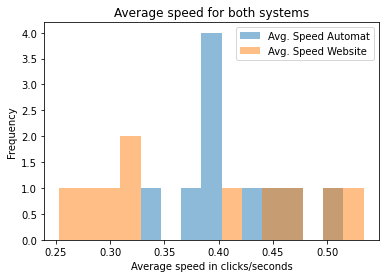

In [64]:
avg_speed = pd.DataFrame([data_complete["Avg_speed_Auto"],data_complete["Avg_speed_Web"]]).transpose()
avg_speed.columns = ["Avg. Speed Automat","Avg. Speed Website"]
g = avg_speed.plot.hist(bins=15, alpha=0.5)
g.set_xlabel("Average speed in clicks/seconds")
g.set_title("Average speed for both systems")
g.get_figure().savefig("Plots/avg_speed.png",bbox_inches = "tight")

In [65]:
avg_speed.describe()

Avg. Speed Automat  Avg. Speed Website
count           10.000000           10.000000
mean             0.409531            0.384318
std              0.049228            0.100092
min              0.331378            0.253197
25%              0.385906            0.301517
50%              0.393823            0.369524
75%              0.437425            0.461753
max              0.496933            0.533679

## <font color="red">Result</font>: interaction speeds are <font color="red">identical</font>.

## 4. Are average clicks amount significantly different?

### H0: Treatments Automat and Website (2 related samples) have identical (expected) average clicks amount.

In [66]:
stats.ttest_rel(data_complete["Avg_clicks_Auto"],data_complete["Avg_clicks_Web"])

Ttest_relResult(statistic=2.429985344357617, pvalue=0.03798346841221216)

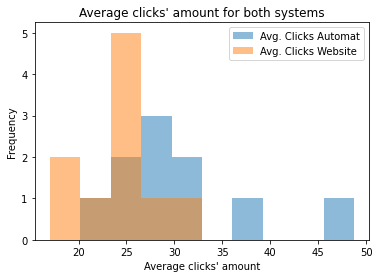

In [67]:
avg_clicks = pd.DataFrame([data_complete["Avg_clicks_Auto"],data_complete["Avg_clicks_Web"]]).transpose()
avg_clicks.columns = ["Avg. Clicks Automat","Avg. Clicks Website"]
g = avg_clicks.plot.hist(bins=10, alpha=0.5)
g.set_xlabel("Average clicks' amount")
g.set_title("Average clicks' amount for both systems")
g.get_figure().savefig("Plots/avg_clicks.png",bbox_inches = "tight")

In [68]:
avg_clicks.describe()

Avg. Clicks Automat  Avg. Clicks Website
count            10.000000            10.000000
mean             30.375000            24.050000
std               8.093422             3.858252
min              20.250000            17.000000
25%              25.812500            23.375000
50%              28.750000            24.250000
75%              31.312500            25.500000
max              48.750000            29.750000

## <font color="red">Result</font>: average clicks amount <font color="red">is significantly different</font>.

### Participants need <font color="red">more clicks</font> to accomplish tasks at the <font color="red">automat</font>.

## 5. Are average durations significantly different?

### H0: Treatments Automat and Website (2 related samples) have identical (expected) average duration.

In [69]:
stats.ttest_rel(data_complete["Avg_duration_Auto"],data_complete["Avg_duration_Web"])

Ttest_relResult(statistic=1.2102092796397095, pvalue=0.25702299202056345)

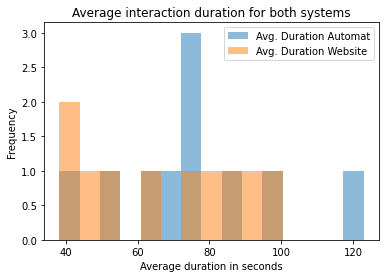

In [70]:
avg_duration = pd.DataFrame([data_complete["Avg_duration_Auto"],data_complete["Avg_duration_Web"]]).transpose()
avg_duration.columns = ["Avg. Duration Automat","Avg. Duration Website"]
g = avg_duration.plot.hist(bins=15, alpha=0.5)
g.set_xlabel("Average duration in seconds")
g.set_title("Average interaction duration for both systems")
g.get_figure().savefig("Plots/avg_duration.png",bbox_inches = "tight")

In [71]:
avg_duration.describe()

Avg. Duration Automat  Avg. Duration Website
count              10.000000              10.000000
mean               75.600000              67.125000
std                22.927482              21.813366
min                40.750000              38.250000
25%                65.062500              48.937500
50%                74.125000              68.375000
75%                82.562500              83.625000
max               123.000000              97.750000

## <font color="red">Result</font>: average duration is <font color="red">identical</font>.

### Participants need in average identical time to accomplish the tasks in both treatments.

# Correlation Analysis

## 6. Does SUS correlates with CSAT score?

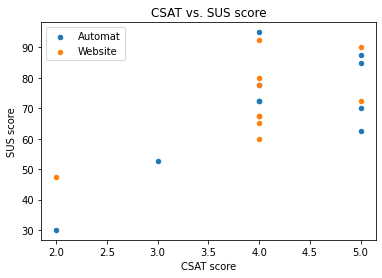

In [72]:
# fig = plt.figure()
ax1 = data_complete.plot.scatter(x="CSAT_Auto",y="SUS_score_Auto",color="tab:blue",label="Automat")
ax2 = data_complete.plot.scatter(x="CSAT_Web",y="SUS_score_Web",color="tab:orange",label="Website",ax=ax1)
ax1.set(xlabel="CSAT score",ylabel="SUS score",title="CSAT vs. SUS score")#.get_figure().savefig("Plots/sus_vs_csat.png",bbox_inches = "tight")
plt.savefig("Plots/sus_vs_csat.png",bbox_inches = "tight")

## 7. Does interaction speed correlates with SUS score?

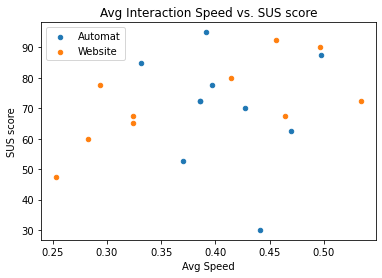

In [73]:
ax3 = data_complete.plot.scatter(x="Avg_speed_Auto",y="SUS_score_Auto",color="tab:blue",label="Automat")
ax4 = data_complete.plot.scatter(x="Avg_speed_Web",y="SUS_score_Web",color="tab:orange",label="Website",ax=ax3)
ax3.set(xlabel="Avg Speed",ylabel="SUS score",title="Avg Interaction Speed vs. SUS score")
plt.savefig("Plots/speed_vs_sus.png",bbox_inches = "tight")

## 8. Does interaction speed correlates with CSAT score?

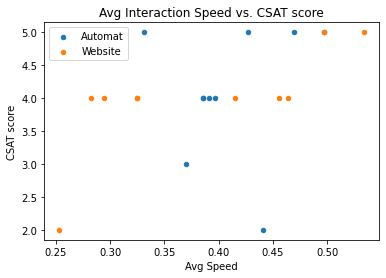

In [74]:
ax5 = data_complete.plot.scatter(x="Avg_speed_Auto",y="CSAT_Auto",color="tab:blue",label="Automat")
ax6 = data_complete.plot.scatter(x="Avg_speed_Web",y="CSAT_Web",color="tab:orange",label="Website",ax=ax5)
ax5.set(xlabel="Avg Speed",ylabel="CSAT score",title="Avg Interaction Speed vs. CSAT score")
plt.savefig("Plots/speed_vs_csat.png",bbox_inches = "tight")

## Plotting statistically significant correlation

In [75]:
def pearson_corr(data, cols):

    corr = []
    pvalues = []

    for col1 in cols:
        for col2 in cols:
            corr.append(pearsonr(data[col1],data[col2])[0])
            pvalues.append(pearsonr(data[col1],data[col2])[1])
    corr = np.array(corr).reshape(len(cols),len(cols))
    pvalues = np.array(pvalues).reshape(len(cols),len(cols))
    
    return corr,pvalues

In [76]:
cols_auto = ["SUS_score_Auto","CSAT_Auto","Avg_speed_Auto","Avg_duration_Auto","Avg_clicks_Auto"]
cols_web = ["SUS_score_Web","CSAT_Web","Avg_speed_Web","Avg_duration_Web","Avg_clicks_Web"]
corr_auto,p_auto = pearson_corr(data_complete,cols_auto)
corr_web,p_web = pearson_corr(data_complete,cols_web)

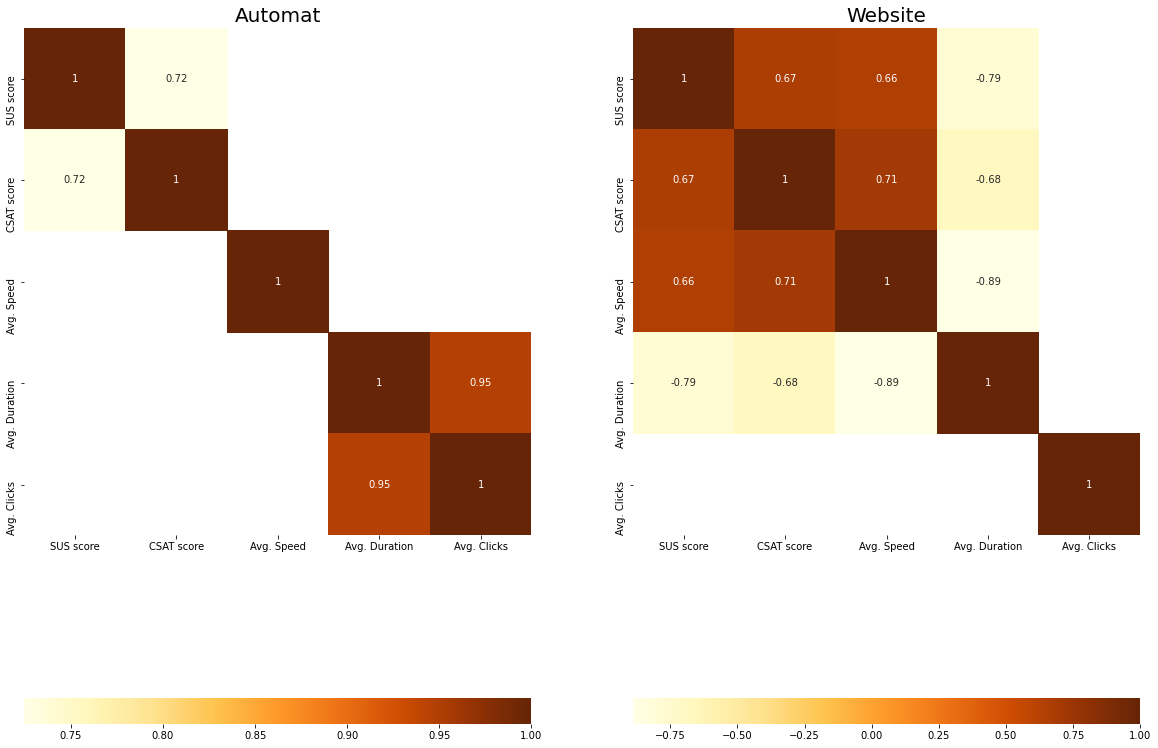

In [77]:
corr_auto[p_auto>0.05] = None
corr_web[p_web>0.05] = None
ticks = ["SUS score","CSAT score","Avg. Speed","Avg. Duration","Avg. Clicks"]

fig,ax = plt.subplots(1,2,figsize=(20,20))
sn.heatmap(corr_auto, ax=ax[0],annot=True,cmap="YlOrBr",yticklabels=ticks,xticklabels=ticks,square=True,cbar_kws={"orientation": "horizontal"})
ax[0].set_title('Automat',fontsize=20)
sn.heatmap(corr_web, ax=ax[1],annot=True,cmap="YlOrBr",yticklabels=ticks,xticklabels=ticks,square=True,cbar_kws={"orientation": "horizontal"})
ax[1].set_title('Website',fontsize=20)
plt.savefig("Plots/correlation_matrix.png",bbox_inches = "tight")
# plt.show()

### Interpretation:

Correlation strength:
- .00-.19 “very weak”
- .20-.39 “weak”
- .40-.59 “moderate”
- .60-.79 “strong”
- .80-1.0 “very strong”


See: https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide-2.php
    https://www.statstutor.ac.uk/resources/uploaded/spearmans.pdf

## <font color="red">Result</font>: 

1. SUS and CSAT scores positive strongly correlate for both Automat and Website.

2. SUS and CSAT scores positive strongly correlate with interaction speed for Website.

3. SUS and CSAT scores negative strongly correlate with average interaction duration for Website.


### <font color="red">Attention</font>: we do not consider correlations between interaction speed and clicks / duration, because the former was calculated based on the latter.

## In oder words:

1. The higher the usability, the higher is the satisfaction with both systems.

2. On the website, the higher the interaction speed, the higher the usability score, and the higher the satisfaction.

3. On the website, the longer the interaction with the system, the lower the usability score and the user satisfaction.

# Demographics

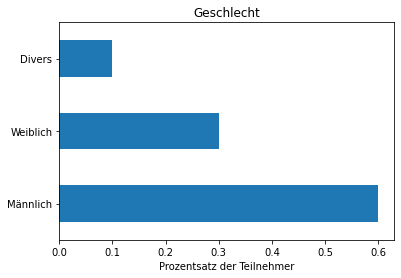

In [88]:
g = data_demographics["Geschlecht"].value_counts(normalize=True).plot(kind="barh", color="tab:blue")
g.set_xlabel("Prozentsatz der Teilnehmer")
g.set_title("Geschlecht")
g.get_figure().savefig("Plots/geschlecht.png",bbox_inches = "tight")

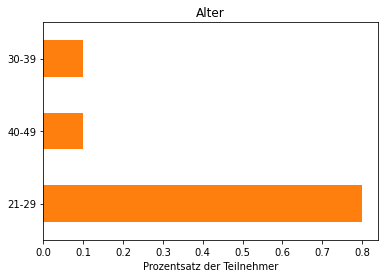

In [89]:
g = data_demographics["Alter"].value_counts(normalize=True).plot(kind="barh", color="tab:orange")
g.set_xlabel("Prozentsatz der Teilnehmer")
g.set_title("Alter")
g.get_figure().savefig("Plots/alter.png",bbox_inches = "tight")

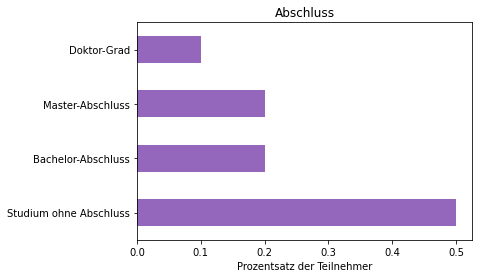

In [90]:
g = data_demographics["Abschluss"].value_counts(normalize=True).plot(kind="barh", color="tab:purple")
g.set_xlabel("Prozentsatz der Teilnehmer")
g.set_title("Abschluss")
g.get_figure().savefig("Plots/studium.png",bbox_inches = "tight")

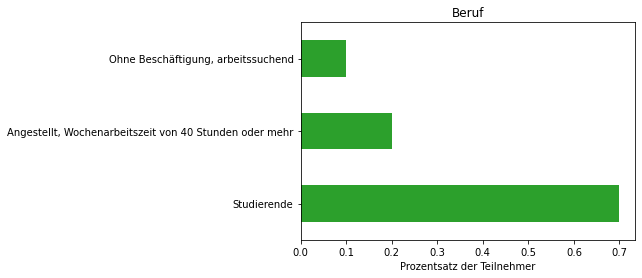

In [91]:
g = data_demographics["Beruf"].value_counts(normalize=True).plot(kind="barh", color="tab:green")
g.set_xlabel("Prozentsatz der Teilnehmer")
g.set_title("Beruf")
g.get_figure().savefig("Plots/beruf.png",bbox_inches = "tight")

### Survey Question: "Wie oft kaufen Sie Fahrkarten auf der DB Website/Automat?"

In [82]:
cat = ["Nie","Einmal im Jahr","Höchstens dreimal im Jahr","Höchstens sechsmal im Jahr","Zwischen sieben- und zwölfmal im Jahr","Bis dreimal monatlich","Jede Woche"]

In [83]:
def system_usage(data,categories):
    values = []

    for k in categories:
        if k in data.value_counts(dropna=False).index:
            values.append(data.value_counts(dropna=False,normalize=True)[k])
        else:
            values.append(0)
    return pd.Series(values,index=categories)

In [84]:
usage_automat = system_usage(data_demographics["Nutzung_automat"],cat)
usage_web = system_usage(data_demographics["Nutzung_web"],cat)

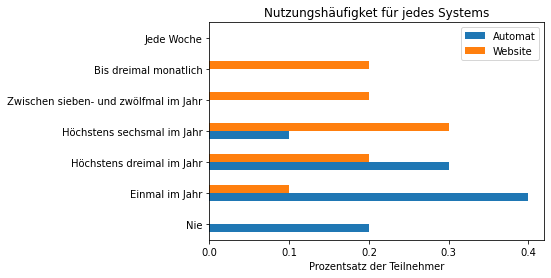

In [92]:
g = pd.DataFrame([usage_automat,usage_web],index=["Automat","Website"]).transpose().plot(kind="barh",xticks=[0,0.1,0.2,0.3,0.4])
g.set_xlabel("Prozentsatz der Teilnehmer")
g.set_title("Nutzungshäufigket für jedes Systems")
g.get_figure().savefig("Plots/nutzungshaufigkeit.png",bbox_inches = "tight")

## <font color="red">Result</font>:

1. 60% of participants are men.

2. 80% of participants are between 21-29 years old.

3. 50% are bachelor students.

4. 70% are students in general, 20% work, and only one person is currently looking for a job.

5. Participants book tickets more often on the Website than at the ticket machine.